# Part I - (Ford GoBike System Data Exploration)
## by (Samantha Erskine)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in the month and year of February 2019. It contains 183412 rows and 16 columns, and is stored in a csv file. Columns include duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude,start_station_longitude, end_station_id, end_station_name,end_station_latitude, end_station_longitude, bike_id, user_type,
member_birth_year, member_gender, and bike_share_for_all_trip.
      

## Preliminary Wrangling


In [96]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [97]:
#Loading in the dataset of Ford gobike share system csv file
gobike=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Afrofem Data Analytics 2 class\201902-fordgobike-tripdata.csv")

In [98]:
#Investigating csv file dataset further
gobike.shape

(183412, 16)

In [99]:
gobike.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [100]:
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [101]:
#Investigating the datatypes of the dataset
gobike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [118]:
#Investigating csv file dataset further using the .info() function
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [119]:
#Checking for null values in the data set
gobike.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [120]:
#Investigating the null values in the member_gender column
gobike[gobike['member_gender'].isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.6630,2019-02-01 01:42:36.8780,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.3660,2019-02-01 01:39:05.9500,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.4200,2019-02-01 01:23:37.6450,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.6410,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


In [121]:
#Investigating the null values in the member_birth_year column
gobike[gobike['member_birth_year'].isna()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.6630,2019-02-01 01:42:36.8780,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.3660,2019-02-01 01:39:05.9500,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.4200,2019-02-01 01:23:37.6450,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.6410,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


In [122]:
#Dropping null values from the data set and creating a copy of the data set to wrangle
gobike_clean=gobike.copy()
gobike_clean.dropna(inplace=True)


In [123]:
gobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [124]:
#Checking for duplicates in the data set
gobike_clean.duplicated().sum()

0

In [125]:
#Creating a new column named duration_min to change duration in second column, duration_sec into minutes
gobike_clean['duration_min']= (gobike.duration_sec/60).astype(int)

#Dropping columns that are not needed for this particular analysis
gobike_clean.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','duration_sec'],axis=1,inplace=True)


In [126]:
#Creating a member_age column from the member_birth_year column that was provided
gobike_clean['member_age']=(2019-gobike_clean.member_birth_year).astype(int)

#Creating a new column that specifies the duration in hours
gobike_clean['duration_hour'] = (gobike_clean.duration_min/60).astype(int)

#Changing member_birth_year column from float to int
gobike_clean['member_birth_year']=gobike_clean['member_birth_year'].astype(int)

In [127]:
#Checking the Value count of the duration in hour
gobike_clean.duration_hour.value_counts()

0     173566
1        848
2        208
3         91
4         46
5         35
6         17
9         17
14        13
17        13
7         13
8         12
13        11
10        10
12         9
19         7
15         7
11         6
20         6
18         5
16         5
23         4
22         3
Name: duration_hour, dtype: int64

In [128]:
#Giving categorical values to member_age for further analysis
#People from ages 0-30 are categorized as young, 30-60 are categorized as middle aged and 60-150 are categorized as old
gobike_clean['member_age_group'] =pd.cut(x=pd.to_numeric(gobike_clean['member_age'], errors='coerce'), bins=[0,30,60,150], labels=["young","middle_aged","old"])

### What is the structure of your dataset?

> There are 183,412 single bike uses of the ford gobike sharing system, in the month of February in 2019, with 16 columns. The details in the columns include the location, times and ids and member information about the bike sharers.

### What is/are the main feature(s) of interest in your dataset?

> The main features include, how long the ford gobikes have been ridden by individuals, whether or not they chose to use the bike for all trips, as well as some member information on people who borrowed the bikes. Including their birth years and genders.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The duration of the bike use, and the member's information, such as birth year, gender and user type.

## Univariate Exploration

In [129]:
#Defining a function to format visualizations.
def Format( x_label, y_label, title):
    plt.title(title,size=20,fontweight='bold')
    plt.xlabel(x_label,size=18)
    plt.ylabel(y_label,size=18)
    plt.show()


### What is the distribution of gender among riders?

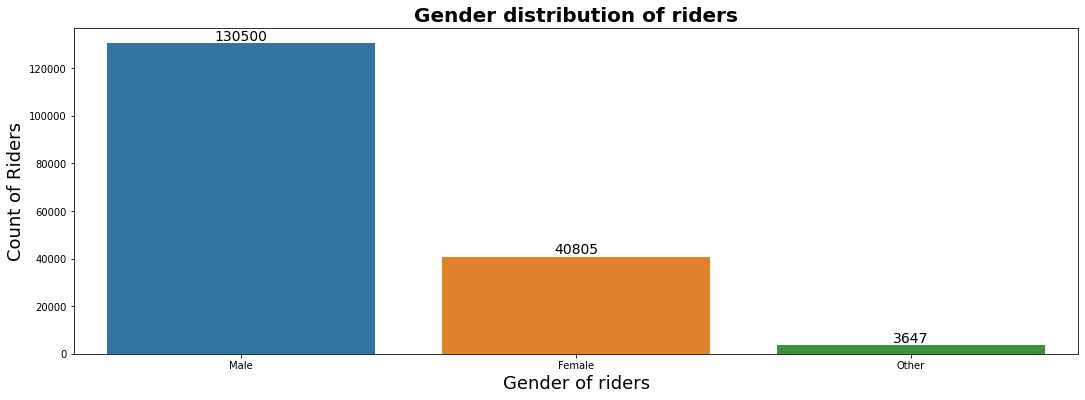

In [130]:
#Gender distribution
plt.figure(figsize=[18,6])
gender_counts = gobike_clean['member_gender'].value_counts()
gender_order = gender_counts.index
genderdist=sns.countplot(data = gobike_clean, x = 'member_gender',order=gender_order)
plt.bar_label(genderdist.containers[0],size=14,fmt='%.0f')

Format('Gender of riders','Count of Riders', 'Gender distribution of riders');



Males ride bikes more often than both females and other genders.

### What is the distribution of user type among members of Ford gobike share system?

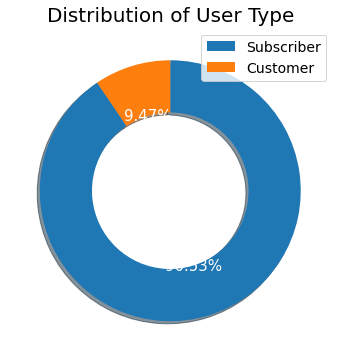

In [131]:
#User_type distributuion
# getting the count of user type
plt.figure(figsize=[18,6])
usertype_counts = gobike_clean['user_type'].value_counts()

# Plotting the graph
wedges, labels, autopct = plt.pie(usertype_counts, labels=usertype_counts.values,startangle=90, counterclock=False, shadow=True, wedgeprops = {'width' : 0.4},autopct='%1.2f%%', textprops={'color':"w"});
plt.setp(autopct, fontsize=15)
plt.setp(labels, fontsize=15)
plt.legend(usertype_counts.index, fontsize=14)
plt.title('Distribution of User Type',size=20);


There are a larger number of subscribers than customers, with 158,386 members being subscribers and 16,566 being customers, as shown in the pie chart.

### What is the distribution of duration in minutes?

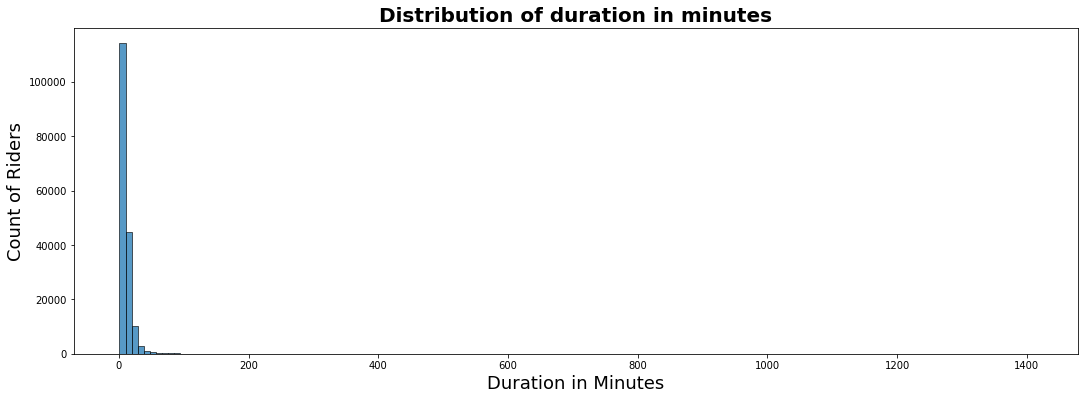

In [132]:
#Distribution of duration in minutes

plt.figure(figsize=[18,6])
sns.histplot(data=gobike_clean,x='duration_min',bins=150);
Format('Duration in Minutes','Count of Riders', 'Distribution of duration in minutes')

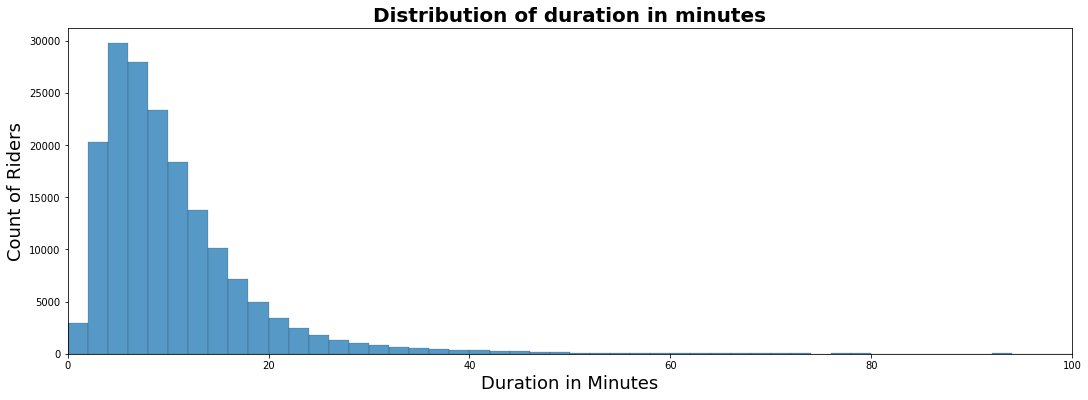

In [133]:
#Duration in minutes distribution
plt.figure(figsize=[18,6])
sns.histplot(data=gobike_clean,x='duration_min',bins=range(0,gobike_clean.duration_min.max()+ 2, 2))
plt.xlim(0,100,10)
Format('Duration in Minutes','Count of Riders', 'Distribution of duration in minutes');

Although duration in minutes once exceeded 1400 minutes, most rides are centered around 0 - 100 minutes. In the second duration distribution, this 100 minute region has been highlighted. The peak of the duration in minutes seems to occur between 4 and 8 minutes.

### What is the distribution of the age of members?



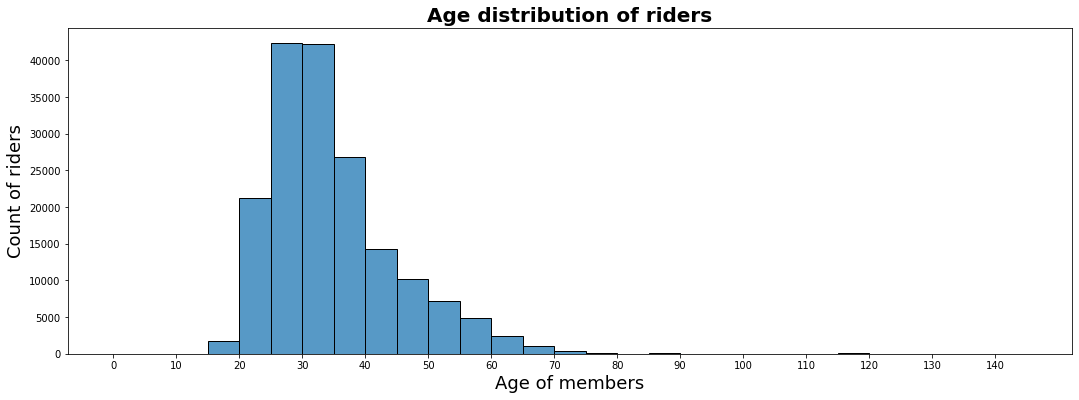

In [134]:
#Age distribution
plt.figure(figsize=[18,6])
base_color = sns.color_palette()[0]
sns.histplot(gobike_clean.member_age,bins=range(0,gobike_clean.member_age.max()+ 5, 5), color = base_color)
plt.xticks(ticks=range(0, 150, 10))
Format('Age of members','Count of riders', 'Age distribution of riders');

This shows the distribution of riders and most riders are between the ages of 25 and 35, while the least amount of riders in terms of age, are those older than 75.

### What is the distribution of bike share for total trip?

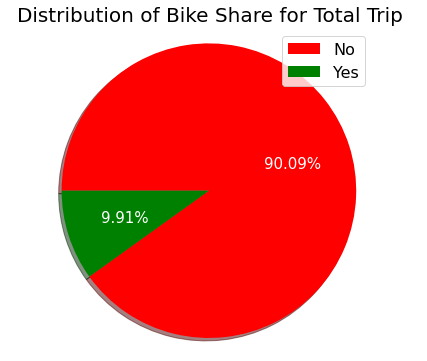

In [136]:
#Bike Share of all trip distribution

plt.figure(figsize=[18,6])
bikeshare_counts = gobike_clean['bike_share_for_all_trip'].value_counts()
colors=['red','green']

#Plotting the pie chart
plt.title('Distribution of Bike Share for Total Trip',size=20)
wedges, labels, autopct=plt.pie(bikeshare_counts,labels = bikeshare_counts.values, startangle = 180, counterclock = False,colors=colors,shadow=True, autopct='%1.2f%%', textprops={'color':"w"})
plt.axis('square')
plt.setp(autopct, fontsize=15)
plt.setp(labels, fontsize=15)
plt.legend(bikeshare_counts.index, fontsize=16);




There seem to be fewer member who used the bike share system for a total trip. 157,606 members did not use bike share for the full trip, and 17,346 used bike share for a full trip. 90.09% of members did not use the bike share for total trip, while 9.91% of members used bike share for a full trip.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Males seem to dominate the genders in the ford go bike share system. Very few people went on trips that exceeded 100 minutes, and using bike share for a total trip is not the most common thing in the bike share system. There are also way more subscribers than customers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> To tidy the data, I created new columns relevant to my analysis. Such as, calculating the duration in minutes instead of seconds. I also changed datatypes such as the change of a float to int in the member_birth_year column.

## Bivariate Exploration


### What is the relationship between Gender and the Duration of Bike Rides in minutes?

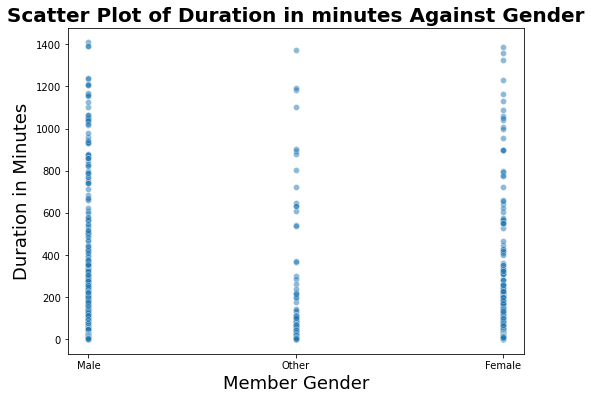

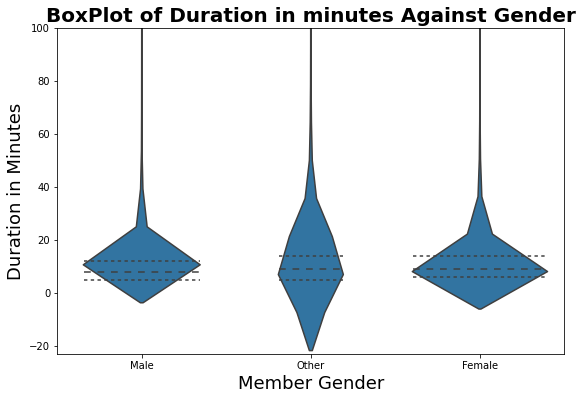

In [26]:
#Gender Vs. Duration in min
plt.figure(figsize = [18, 6])
plt.subplot(1, 2, 1)
sns.scatterplot(data = gobike_clean, x = 'member_gender', y = 'duration_min',alpha=1/2)
Format('Member Gender','Duration in Minutes','Scatter Plot of Duration in minutes Against Gender');

#Gender Vs. Duration in min
plt.figure(figsize = [20, 6])
plt.subplot(1,2,2)
base_color = sns.color_palette()[0]
sns.violinplot(data = gobike_clean, x = 'member_gender', y = 'duration_min', color = base_color,inner='quartile') 
plt.ylim(-23,100)
Format('Member Gender','Duration in Minutes','BoxPlot of Duration in minutes Against Gender');


This scatter plot shows the relationship between duration in minutes and the gender of the members. It indicates a relationship where males run more often than females and other genders, but this might also be because of the difference in numbers, where the number of males exceed the females and other genders. It also indicates that there is a negative correlation between all genders and the number of minutes. That is, relatively fewer people run as the number of minutes increase.



This violin plot shows the relationship between duration in minutes against the gender of members. The violin plot begins in the negatives and ends in 100 minutes on the y-axis. The other genders, which have the most negative values, estimates values very close to negative values, that is zero. Since there are no negative values in the duration in minutes data.  The median duration in minutes is around the same level. The shape of the distribution  of the duration for males and females show that they are highly concentrated around the median. This means more males and females run around the same duration median of about 8 minutes.

### What is the relationship between Bike share for a complete total trip and the user type?

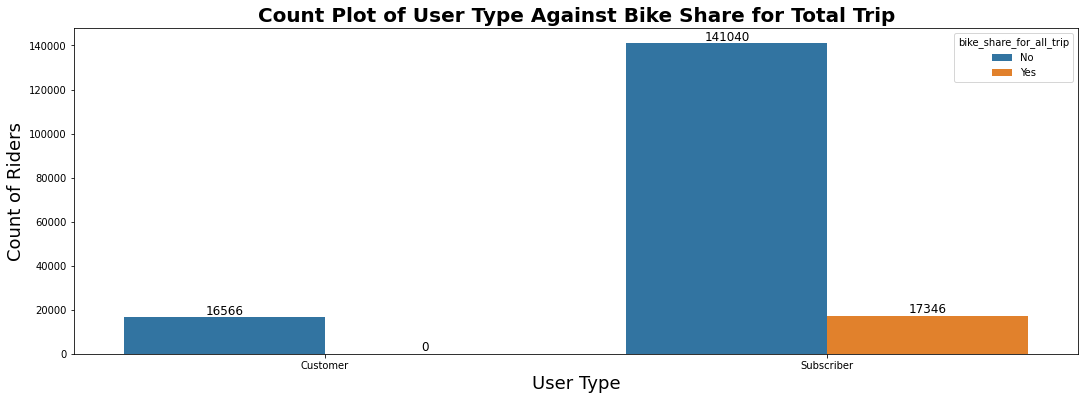

In [27]:
#Bike for total trip Vs Usertype
plt.figure(figsize=[18,6])
bikevsuser= sns.countplot(data=gobike_clean, x='user_type', hue='bike_share_for_all_trip')
plt.bar_label(bikevsuser.containers[0],size=12,fmt= '%.0f')
plt.bar_label(bikevsuser.containers[1],size=12,fmt= '%.0f');
Format('User Type','Count of Riders','Count Plot of User Type Against Bike Share for Total Trip');

This clustered count plot shows the number of bike riders, that used ford go bike share for a return trip, and what user type they opted for(Customer or Subscriber). All customers did not use the bike for a full trip, none of the customers opted for the yes option and 16,566 of them said they did not use bike share for full trip. For subscribers, 17,346 of them used the bike for full trip, and 141,040 of subscribers did not use bikes for full trips.

### What is the relationship between Duration of bike rides in minutes and the age of member as well as their age groups?

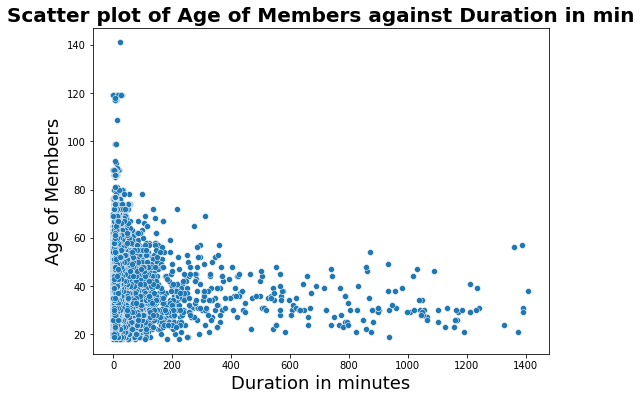

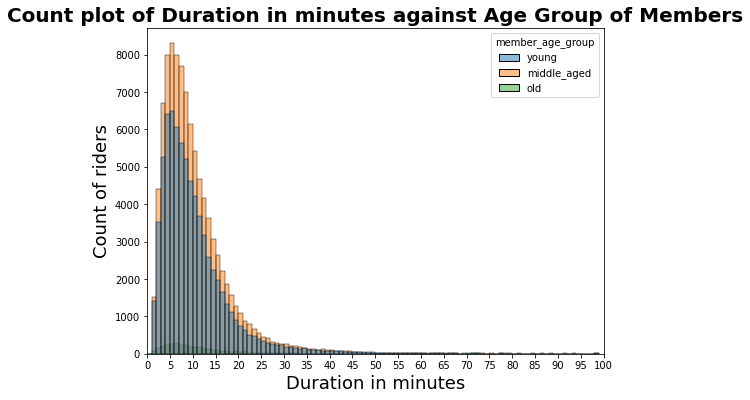

In [28]:
#Duration Vs. Member Age
plt.figure(figsize = [18, 6])
plt.subplot(1, 2, 1)
sns.scatterplot(data = gobike_clean, x = 'duration_min', y = 'member_age')
Format('Duration in minutes','Age of Members','Scatter plot of Age of Members against Duration in min');
#Duration Vs. Age group
plt.figure(figsize = [18, 6])
plt.subplot(1,2,2)
sns.histplot(data=gobike_clean,x='duration_min',hue='member_age_group',bins=range(100))
plt.xlim((0, 100))
plt.xticks(ticks=range(0, 105, 5))
Format('Duration in minutes','Count of riders','Count plot of Duration in minutes against Age Group of Members');

The scatter plot indicates a relationship between the age of members and the duration of minutes in which they rode the ford go bikes. It indicates that people aged between 20 and 60 rode bikes up to 200 minutes and a fewer number of them drove past the 200 minute mark up to 1400 minutes. Above 60 years of age, fewer people ride for a fewer number of minutes. This means there is a negative correlation between the age of members and the number of minutes they ride the bike. It also shows there are a small amount of people who ride aged above 80.


The second subplot is a histogram comparing the duration of bike rides and the age group of members. For this data set, I have grouped the people into three classes. young(0-30 years), middle aged(31-60 years) and old(61-150 years). This plot indicates that a higher number of middle aged people rode for longer hours than younger people and even more so than older people. This histogram is also skewed to the right so the mode is higher than the mean.

In [29]:
#Checking the difference in numbers between the age groups of members
gobike_clean.member_age_group.value_counts()

middle_aged    97155
young          74267
old             3530
Name: member_age_group, dtype: int64

### What is the relationship between using bike share for a complete trip and the Age group of members?

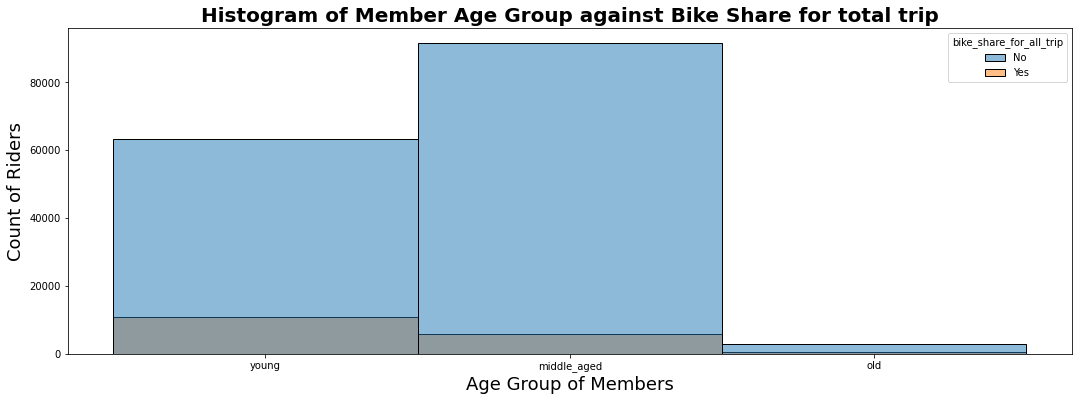

In [30]:
#Bike share for whole trip vs. Age group
plt.figure(figsize = [18,6])
sns.histplot(data=gobike_clean, x='member_age_group', hue="bike_share_for_all_trip")
Format('Age Group of Members','Count of Riders','Histogram of Member Age Group against Bike Share for total trip');


This histogram indicates the relationship between the age group of members and whether they rode the bikes for full trips. All age groups had a higher number of people that did not rather than did. More young people used the bike share for total trips than middle aged and old people.

### What is the relationship between the duration of bike rides in minutes and user type?

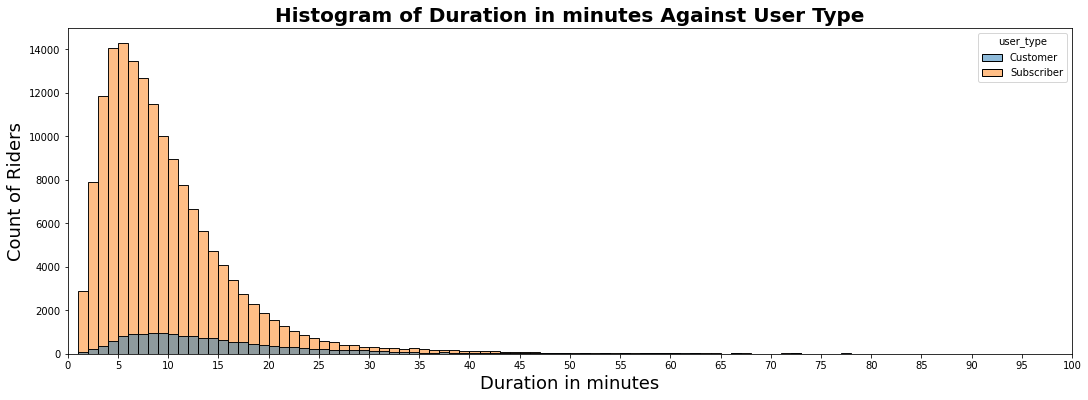

In [31]:
# Duration in minutes Vs. Usertype
plt.figure(figsize = [18,6])
sns.histplot(data=gobike_clean, x='duration_min', hue="user_type",bins=range(100))
plt.xlim((0, 100))
plt.xticks(ticks=range(0, 105, 5))
Format('Duration in minutes','Count of Riders','Histogram of Duration in minutes Against User Type');

Thsi histogram indicates the relationship between the number of minutes people rode and which user type(Customer or Subscriber) they opted for. Most subscribers drove between 5-10 minutes. There were more subscribers than customers. This histogram is skewed to the right so the mode is higher than the mean.

### What is the relationship between the age group of members and the user type they chose?

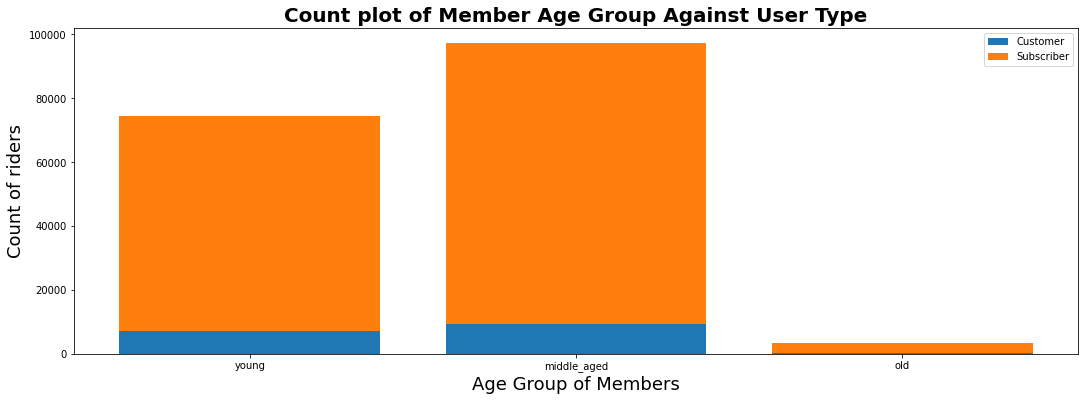

In [32]:
#Age Group vs. User type
plt.figure(figsize = [18,6])

agegroup_order = ['young', 'middle_aged', 'old']
usertype_order = ['Customer', 'Subscriber']

baselines = np.zeros(len(agegroup_order))
# for each second-variable category:
for i in range(len(usertype_order)):
 # isolate the counts of the first category,
    user2 = usertype_order[i]
    inner_counts = gobike_clean[gobike_clean['user_type'] == user2]['member_age_group'].value_counts()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(agegroup_order)), height = inner_counts[agegroup_order], bottom = baselines)
    baselines += inner_counts[agegroup_order]

plt.xticks(np.arange(len(agegroup_order)), agegroup_order)
plt.legend(usertype_order)
Format('Age Group of Members', 'Count of riders', 'Count plot of Member Age Group Against User Type');



This stacked bar chart indicates the relationship between the age group of members and the user type they opted for. There are more subscribers than customers in all age groups, with the highest number of both subscribers and customers belonging to the middle aged group. Followed by the young and finally the smallest age group, which is the old age group. There are more middle aged people than young and old people, which might account for the way this bar chart appears.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Measuring the duration in minutes against variables, gender, age group and age typically took on a negative correlation. Once the duration in minutes rose past a hundred minutes the number of people who went for more minutes reduced. There were many more subscribers than customers. Customer user type members used no bike for full trips.


## Multivariate Exploration


### What is the relationship between the age group of members, the duration of bike rides in minutes and the user type they chose?

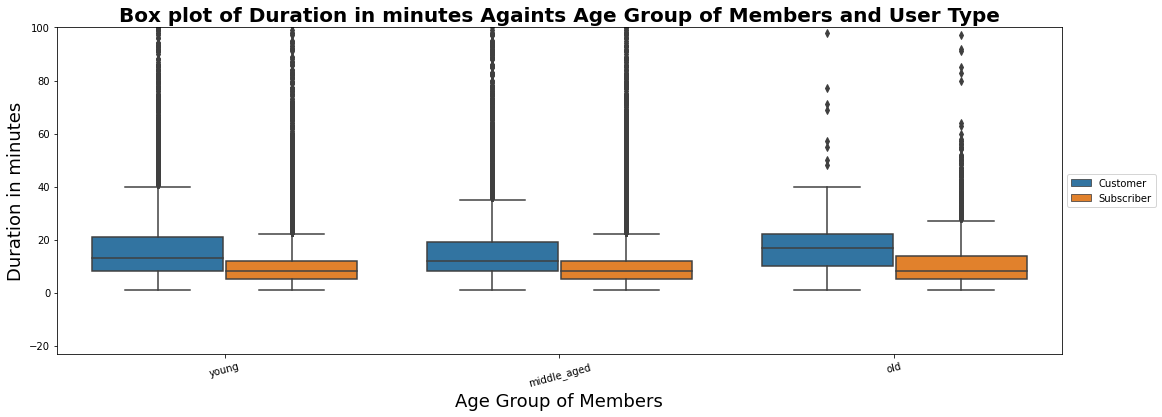

In [33]:
#Member Age Group Vs Duration in minutes Vs User type
plt.figure(figsize = [18, 6])

sns.boxplot(data = gobike_clean, x = 'member_age_group', y = 'duration_min', hue = 'user_type')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.xticks(rotation = 15)
plt.ylim(-23,100)
Format('Age Group of Members','Duration in minutes', 'Box plot of Duration in minutes Againts Age Group of Members and User Type')

In all age groups, the median of the customer lies above that of the subscribers. Which implies that the median of minutes is high for customers in each age group. The highest median of minutes for the customer user type were attributed to the old age group. Whereas the lowest median for the customer user type belonged to the middle aged group. For subscribers the old age group had the lowest median of minutes, wile the young and old age group held a similar amount of minutes.

### What is the relationship between the Gender of members, the age group of members and the duration of bike rides in minutes

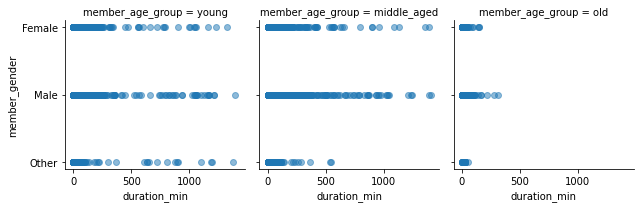

In [34]:
#Member Gender vs. Member Age Group vs. Duration in minutes
facet = sns.FacetGrid(data = gobike_clean, col = 'member_age_group', margin_titles = True)
facet.map(plt.scatter, 'duration_min', 'member_gender',alpha=1/2);


In this facetgrid, it shows the relationship between gender, age group and the duration of rides in minutes. For all age groups, there is a negative corellation of all genders and the duration of rides. For the middle aged group there are more males that rode past 500 minutes than any other group. In the old age group the minutes ridden are lower for all genders than other age groups. There are more males in each age group than female and other genders who use the Ford Gobike share system.

### What is the relationship between the age group of members, using bike share for a total return trip and the duration of bike rides in minutes?

### What is the relationship between the Gender of members, using bike share for a total return trip and the duration of bike rides in minutes?

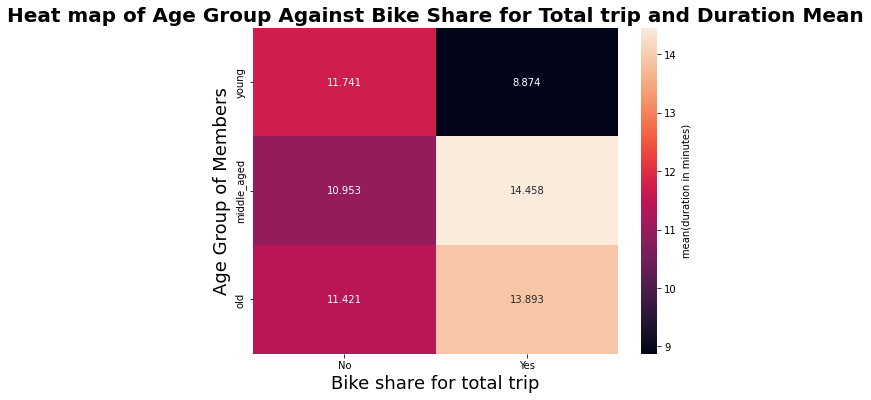

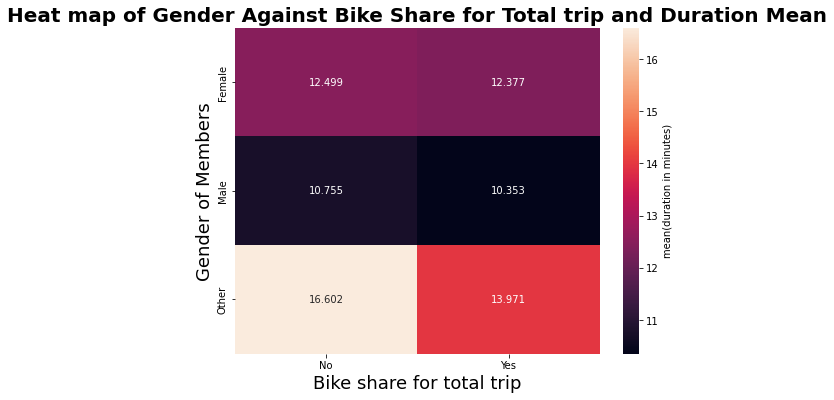

In [140]:
#Age Group Vs Bike Share for total trip Vs Duration in Min
plt.figure(figsize = [18, 6])

plt.subplot(1,2,1)
grouped_means = gobike_clean.groupby(['bike_share_for_all_trip', 'member_age_group']).mean()['duration_min']
grouped_means = grouped_means.reset_index(name = 'duration_min_avg')
grouped_means = grouped_means.pivot(index = 'member_age_group', columns = 'bike_share_for_all_trip',values = 'duration_min_avg')
sns.heatmap(grouped_means, annot = True, fmt = '.3f', cbar_kws = {'label' : 'mean(duration in minutes)'})
Format('Bike share for total trip','Age Group of Members','Heat map of Age Group Against Bike Share for Total trip and Duration Mean')

#Gender Vs Bike Share for total trip Vs Duration in Min
plt.figure(figsize=(18,6))
plt.subplot(1,2,2)
grouped_means = gobike_clean.groupby(['bike_share_for_all_trip', 'member_gender']).mean()['duration_min']
grouped_means = grouped_means.reset_index(name = 'duration_min_avg')
grouped_means = grouped_means.pivot(index = 'member_gender', columns = 'bike_share_for_all_trip',values = 'duration_min_avg')
sns.heatmap(grouped_means, annot = True, fmt = '.3f', cbar_kws = {'label' : 'mean(duration in minutes)'})
Format('Bike share for total trip','Gender of Members','Heat map of Gender Against Bike Share for Total trip and Duration Mean');


In the left heatmap subplot, it shows the relationship between age groups of members, the mean duration in minutes and whether individuals used the bike for all of their trip. The darker the section, the lower the mean number of minutes.
The highest mean is located at the middle age group that used the bike share for all groups.


In the right heatmap subplot, it shows the relationship between gender, the mean of duration in minutes and whether or not they used the bike share system. The male gender showed low mean of duration in the bike share for all trips. Other genders showed the highest mean of minutes in people who did not use the bike share for a full trip.


### What is the relationship between the duration of bike rides in minutes, the birth year of members and the user type they chose?

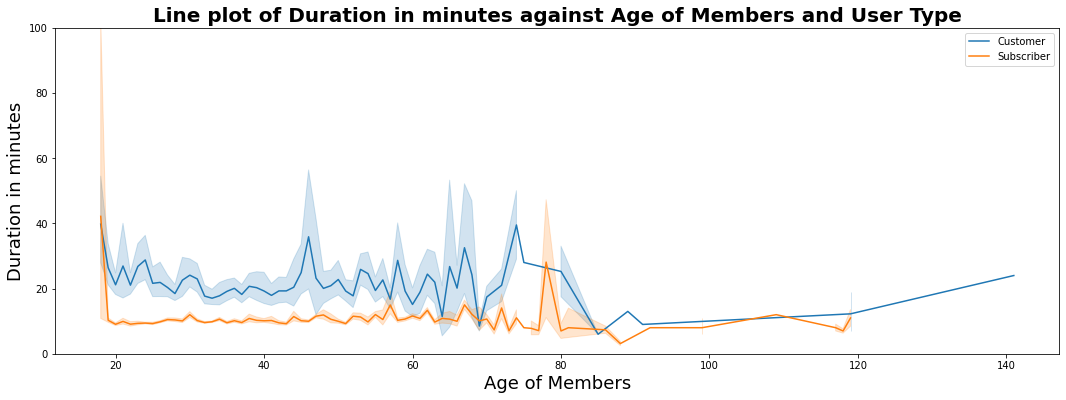

In [36]:
#Duration in Minutes Against Birth year and User type
plt.figure(figsize=[18,6])
sns.lineplot(data= gobike_clean,x='member_age',y='duration_min',hue='user_type')
plt.ylim(0,100)
plt.legend()
Format('Age of Members','Duration in minutes', 'Line plot of Duration in minutes against Age of Members and User Type');

This line plot shows the relationships between the age of members theit duration in minutes ridden and which user type they opted for

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Further insight was seen from the bivariate and univariate visualisations. Different variables such as age of members and gender showed some variation, as they were compared against other features such as the user type.

### Were there any interesting or surprising interactions between features?

> In my box plot, I saw that the median number of minutes for old people age group(61-150 years)was very high, this was clearly shown in my later line plot analysis, which showed a spike in customer user type minutes for the specified age range.

## Conclusions
>


The features of my interest were duration of the bike rides, which was converted to minutes, the user type the members chose, the birth year and genders as well as whether or not they used the bikes for all trips. In the univariate visualizations, it showed further investigation into each feature, giving the general explanation into these features.
As we move on to the bivariate explorations with two variable, the variables were able to be measured against each other. For instance gender against duration of minutes or user type. These showed the features formally looked into in the context of other variations. Moving on to the multivariate visualizations, its showed the relationship between three variation. For instance the facet grid that showed how far people rode the bikes in the context of their gender and their age group which I categorized(young, middle aged and old). As we move further toward the end, more insight is clearly shown on the different features.